In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as io

In [2]:
lambda_=0.01
radius=10
sigma=0.1
C0=0.8
B=2e+6

r0=[radius,radius]/np.sqrt(2)
r0

array([7.07106781, 7.07106781])

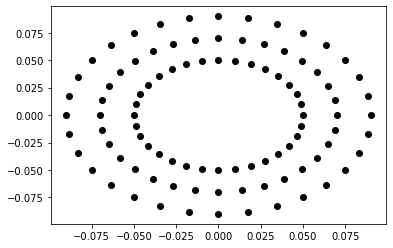

In [3]:
p=np.zeros([96,2])
for j,r in enumerate([0.05,0.07,0.09]):
    for i in range(32):
        alpha_i=i/32*np.pi*2
        p[i+j*32]=r*np.array([np.cos(alpha_i),np.sin(alpha_i)])

plt.plot(p[:,0],p[:,1],'ko')
plt.show()

In [4]:
w=np.exp(-1j*2*np.pi*np.dot(p,r0)/(radius*lambda_))
w.shape

(96,)

In [5]:
N=10000
thetas=np.linspace(0,2*np.pi,N)
r=radius*np.array([np.cos(thetas),np.sin(thetas)])
r.shape

(2, 10000)

In [6]:
b_gain=abs(w@np.exp(1j*2*np.pi*np.dot(p,r)/(radius*lambda_)))
print(b_gain)

[11.89750589 11.54144654 11.18319698 ... 12.601918   12.25109074
 11.89750589]


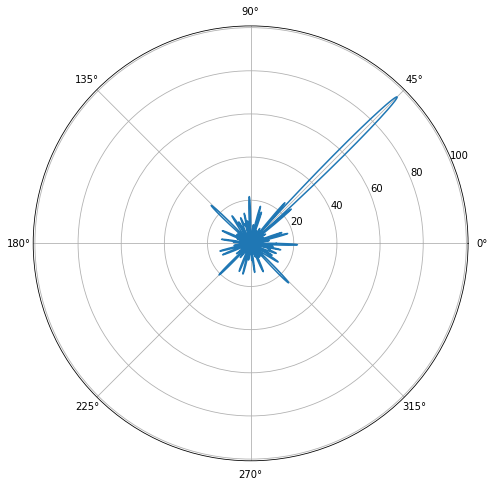

In [7]:
plt.figure(figsize=(10,8))
plt.polar()
plt.plot(np.arange(N)/N*2*np.pi,b_gain)
plt.show()

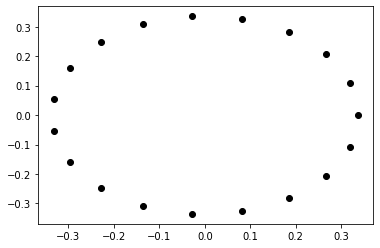

In [8]:
data=io.loadmat('data/data_1.mat')
directions=data['directions']
xyz=data['xyz']
src=data['src_model']
plt.plot(xyz[:,0],xyz[:,1],'ko')
plt.show()

In [9]:
lambda_ = 0.336845458426966
sigma = 0.1
C0 = 0.8
B = 2e6 
N=src.shape[0]
r=src[:,0:2].T
r.shape

(2, 121)

In [10]:
R_user = np.zeros(directions.shape+(121,))
R_user.shape

(10, 2, 121)

In [12]:
for i in range(directions.shape[0]):
    for j in range(directions.shape[1]):
        angle=directions[i,j]/360*2*np.pi
        r0=[np.cos(angle), np.sin(angle)]
        w=np.exp(-1j*2*np.pi*np.dot(xyz,r0)/lambda_)
        w=w/np.sqrt(np.sum(abs(w)**2))
        b_gain=abs(w@np.exp(1j*2*np.pi*np.dot(xyz,r)/(lambda_)))
        for k in range(N):
            R_user[i,j,k]=B*np.log2(1+(b_gain[k]**2/2)/sigma*C0)

R_aver=np.mean(R_user)/N
R_aver

43103.817615898384

In [13]:
N=10000
thetas=np.linspace(0,2*np.pi,N)
r=np.array([np.cos(thetas),np.sin(thetas)])
i,j=0,0
angle=directions[i,j]/360*2*np.pi
r0=[np.cos(angle), np.sin(angle)]
w=np.exp(-1j*2*np.pi*np.dot(xyz,r0)/lambda_)
b_gain=abs(w@np.exp(1j*2*np.pi*np.dot(xyz,r)/(lambda_)))
directions[0,0]

92.30000000000001

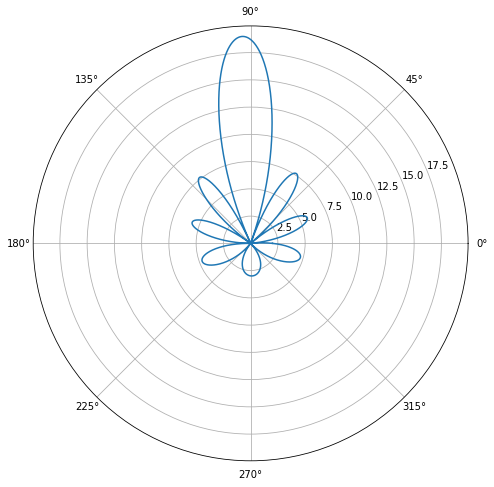

In [14]:
plt.figure(figsize=(10,8))
plt.polar()
plt.plot(np.arange(N)/N*2*np.pi,b_gain)
plt.show()

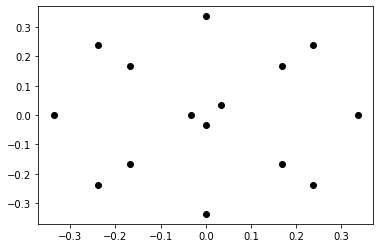

In [15]:
data=io.loadmat('data/data_2.mat')
directions=data['directions'][0]
xyz=data['xyz']
src=data['src_model']
plt.plot(xyz[:,0],xyz[:,1],'ko')
plt.show()

In [16]:
lambda_ = 0.336845458426966
sigma = 0.1
C0 = 0.8
B = 2e6 
N=src.shape[0]
r=src[:,0:2].T
R_user = []
r.shape

(2, 121)

In [17]:
for i,direction in enumerate(directions):
    for j,angle in enumerate(direction[0]):
        angle=angle/360*2*np.pi
        r0=[np.cos(angle), np.sin(angle)]
        w=np.exp(-1j*2*np.pi*np.dot(xyz,r0)/lambda_)
        w=w/np.sqrt(np.sum(abs(w)**2))
        b_gain=abs(w@np.exp(1j*2*np.pi*np.dot(xyz,r)/(lambda_)))
        for k in range(N):
            R_user.append(B*np.log2(1+(b_gain[k]**2/2)/sigma*C0))

R_aver=np.mean(R_user)/N
R_aver

43536.073233021656

In [18]:
N=10000
thetas=np.linspace(0,2*np.pi,N)
r=np.array([np.cos(thetas),np.sin(thetas)])
i,j=0,0
angle=directions[0][0][1]/360*2*np.pi
r0=[np.cos(angle), np.sin(angle)]
w=np.exp(-1j*2*np.pi*np.dot(xyz,r0)/lambda_)
w=w/np.sqrt(np.sum(abs(w)**2))
b_gain=abs(w@np.exp(1j*2*np.pi*np.dot(xyz,r)/(lambda_)))
directions[0][0][0]

88.7

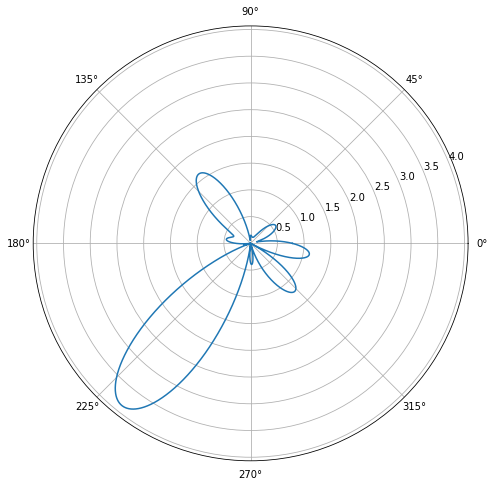

In [19]:
plt.figure(figsize=(10,8))
plt.polar()
plt.plot(np.arange(N)/N*2*np.pi,b_gain)
plt.show()